<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml14_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습(Unsupervised Learning)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# 데이터셋

[Fruits-360](https://www.kaggle.com/datasets/moltean/fruits): 140,340개의 과일/채소/견과류 이미지들

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits.npy

--2026-02-04 00:52:23--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-04 00:52:24--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-04 00:52:24--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

*   Jupyter 노트북에서는 Linux 명령어를 사용할 수 있음.
    *   !Linux_command
*   `wget URL -O file_name`: URL 주소의 파일을 다운로드해서 file_name 이름의 파일로 저장.
*   확장자 npy 파일: numpy 배열을 저장하는 바이너리 파일.
    *   `np.load()` 함수로 파일에서 배열을 추출할 수 있음.

In [5]:
fruits = np.load('fruits.npy')

In [6]:
fruits.shape  #> (300, 100, 100) => (n_samples, height, width)
# 100x100 크기의 흑백 이미지 300개를 numpy 배열로 저장한 데이터셋.

(300, 100, 100)

## 데이터 시각화

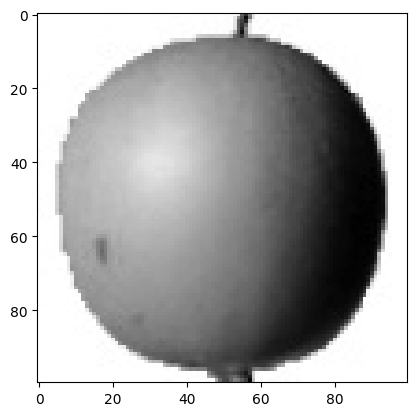

In [8]:
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

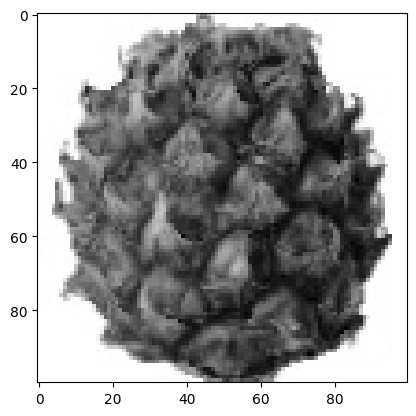

In [9]:
plt.imshow(fruits[100], cmap=plt.cm.binary)
plt.show()

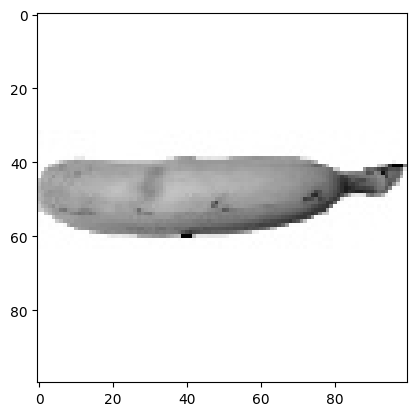

In [10]:
plt.imshow(fruits[200], cmap=plt.cm.binary)
plt.show()

배열의 이미지를 100개씩 시각화

In [18]:
def plot_img_array(arr, ncols=10):
    n = len(arr)  # 배열의 아이템 개수.
    nrows = int(np.ceil(n / ncols))  # Axes(subplot)의 행의 개수

    # figsize=(figure_width, figure_height)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows))

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j  # arr에서 사용할 인덱스
            if idx < n:  # idx는 배열의 아이템 개수보다 크면 안되기 때문에
                img = arr[idx]
                axes[i, j].imshow(img, cmap=plt.cm.binary)
            axes[i, j].axis('off')

    plt.show()

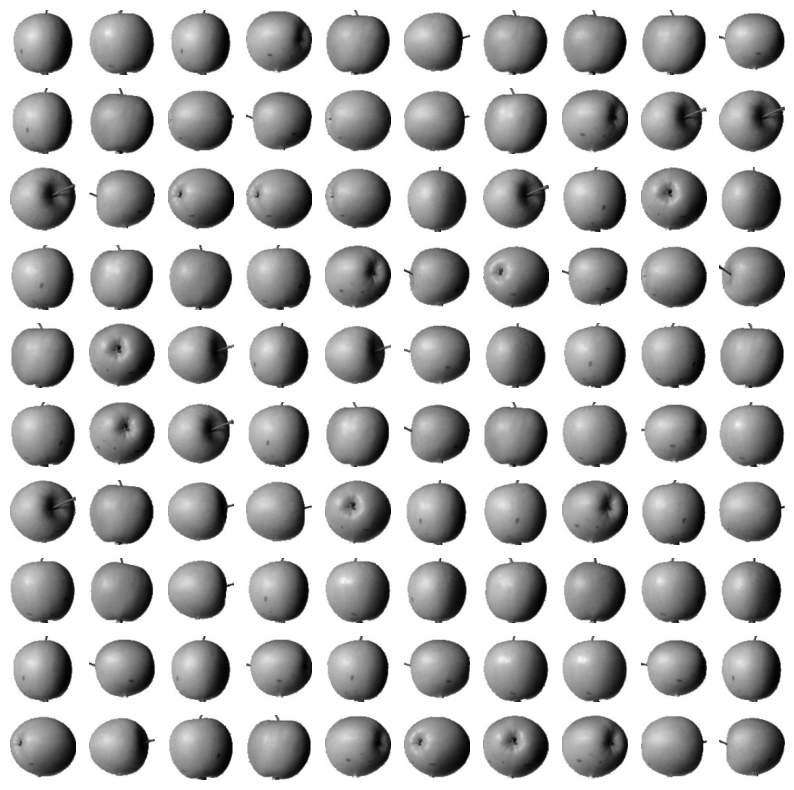

In [20]:
plot_img_array(fruits[:100])

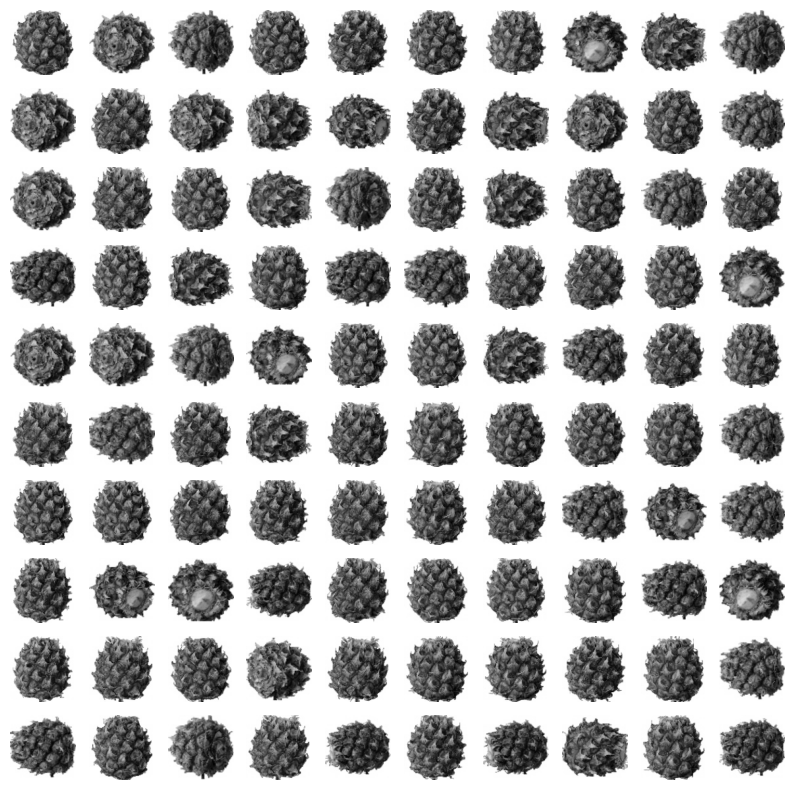

In [21]:
plot_img_array(fruits[100:200])

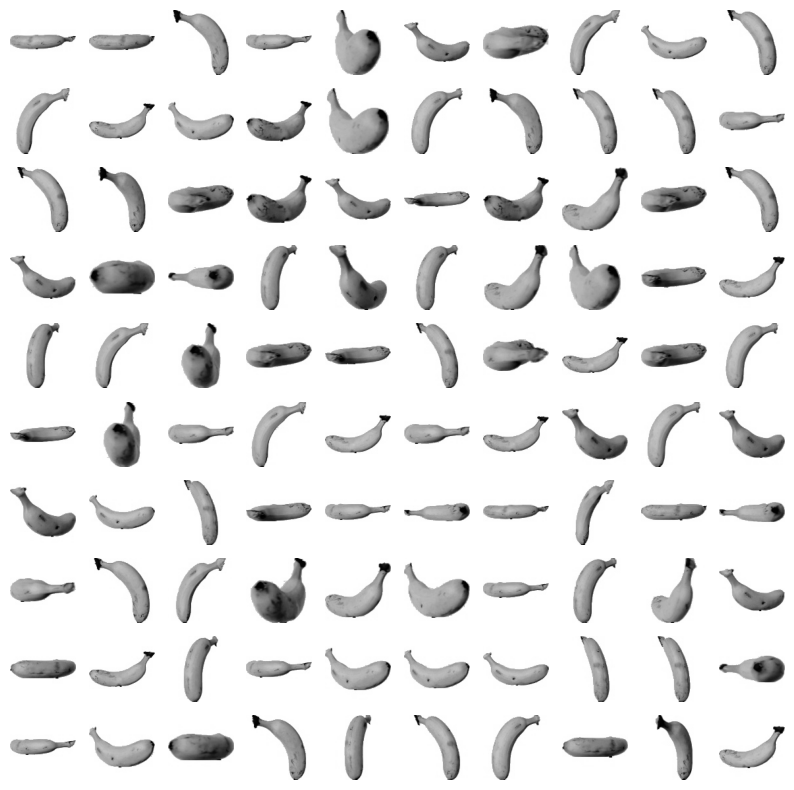

In [22]:
plot_img_array(fruits[200:])

# 이미지 Pixel 분석

(n_samples, height, width) 모양의 3차원 배열을 (n_samples, height x width) 모양의 2차원 배열로 변환.

In [23]:
fruits_2d = fruits.reshape((300, -1))  # (300, 100 * 100)

In [24]:
fruits_2d.shape

(300, 10000)

In [25]:
apples = fruits_2d[:100]
pineapples = fruits_2d[100:200]
bananas = fruits_2d[200:]

## 각각의 과일 샘플에서 모든 픽셀의 평균값

In [27]:
apple_means = apples.mean(axis=1)  # 각 사과에서 10,000개 pixel들의 평균
print(apple_means)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [28]:
pineapple_means = pineapples.mean(axis=1)
banana_means = bananas.mean(axis=1)

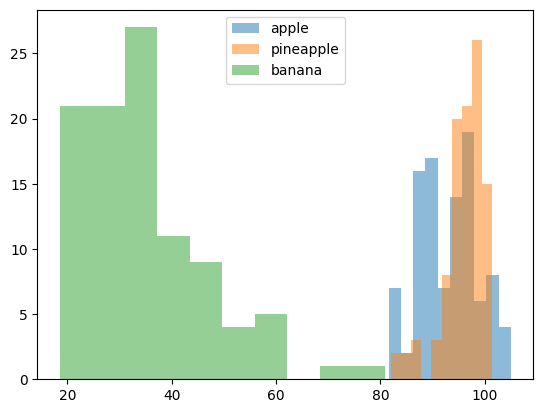

In [32]:
plt.hist(apple_means, alpha=0.5, label='apple')
plt.hist(pineapple_means, alpha=0.5, label='pineapple')
plt.hist(banana_means, alpha=0.5, label='banana')

plt.legend()
plt.show()

과일 이미지에서 모든 픽셀(10,000개)의 평균값을 사용하면 바나나를 다른 과일(사과, 파인애플)과 구분하기는 쉬울 것 같지만, 사과와 파인애플은 평균들이 속하는 구간이 비슷해서 구분하기 어려울 것 같음.

## 각 픽셀들의 평균

In [34]:
apple_px_means = apples.mean(axis=0)
pineapple_px_means = pineapples.mean(axis=0)
banana_px_means = bananas.mean(axis=0)

픽셀들의 평균 막대 그래프

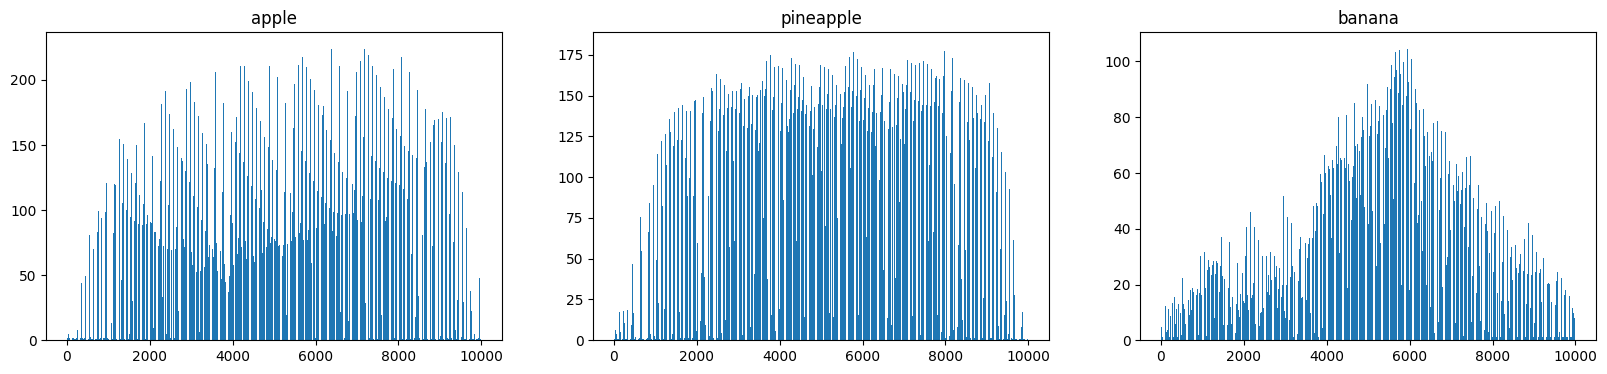

In [39]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 4))
x = np.arange(10_000)
axes[0].bar(x, apple_px_means)
axes[0].set_title('apple')
axes[1].bar(x, pineapple_px_means)
axes[1].set_title('pineapple')
axes[2].bar(x, banana_px_means)
axes[2].set_title('banana')

plt.show()

*   각 픽셀 평균값(10,000개)은 (10000,) 모양의 1차원 배열
*   (100, 100) 모양의 2차원 배열로 변환
*   이미지 시각화(`plt.imshow`)

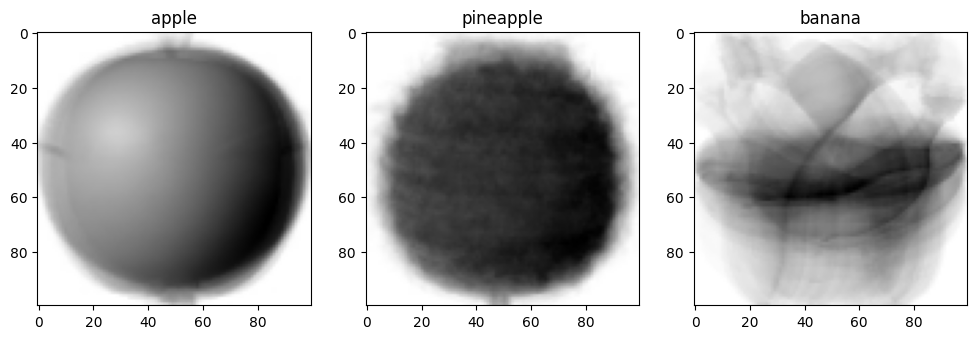

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
axes[0].imshow(apple_px_means.reshape((100, 100)), cmap=plt.cm.binary)
axes[0].set_title('apple')
axes[1].imshow(pineapple_px_means.reshape((100, 100)), cmap=plt.cm.binary)
axes[1].set_title('pineapple')
axes[2].imshow(banana_px_means.reshape((100, 100)), cmap=plt.cm.binary)
axes[2].set_title('banana')

plt.show()

# 각 픽셀의 평균값들과 가까운 이미지 찾기

사과의 각 픽셀 평균값들과 가까운 이미지들 찾기

In [43]:
apple_px_means.shape

(10000,)

In [44]:
fruits.shape

(300, 100, 100)

In [45]:
diff = np.abs(fruits - apple_px_means.reshape((100, 100)))

In [46]:
diff.shape

(300, 100, 100)

In [47]:
diff_mean = np.mean(diff, axis=(1, 2))

In [48]:
diff_mean.shape

(300,)

In [50]:
apple_like_idx = np.argsort(diff_mean)[:100]
apple_like_idx

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

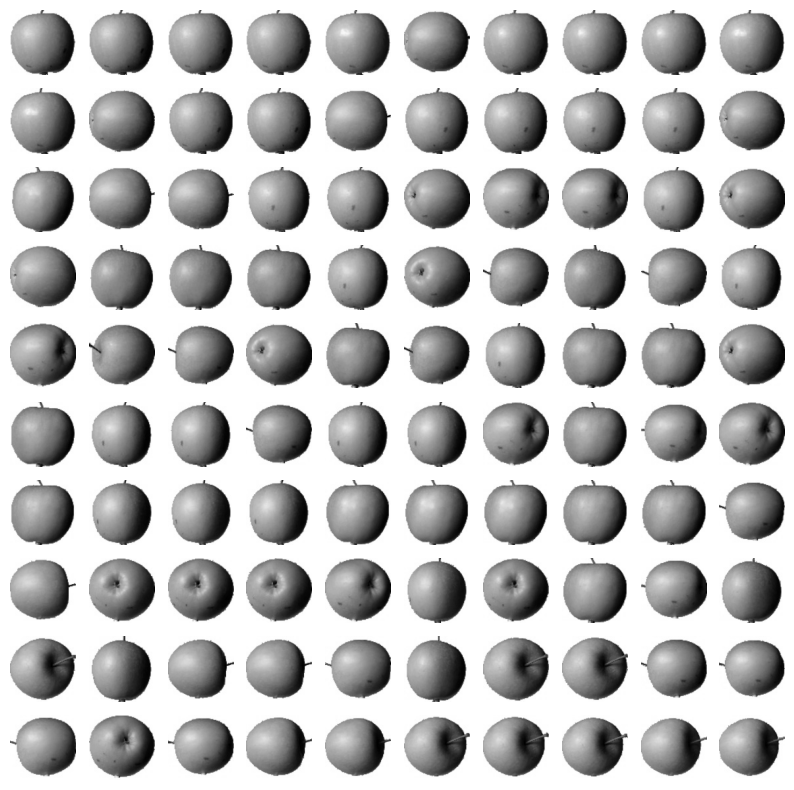

In [51]:
plot_img_array(fruits[apple_like_idx])

파인애플의 각 픽셀들의 평균과 거리가 짧은 이미지 샘플들

In [52]:
diff = np.abs(fruits - pineapple_px_means.reshape((100, 100)))
diff_mean = np.mean(diff, axis=(1, 2))
pineapple_like_idx = np.argsort(diff_mean)[:100]
print(pineapple_like_idx)

[111 152 164 137 136 129 166 150 165 101 174 192 117 140 182 184 148 181
 100 193 191 120 175 162 154 157 155 186 121 103 122 145 138 161 118 176
 160 127 144 156 158 105 104 102 188 124 112 198 185 177 133 125 131 109
 180 110 106 149 115 187 163 170 141 159 183 142 128 195 147 167 119 189
 190 151 135 169 123 171 143 168 107 113 108 139 130 197 134 116 199 172
  77 179 146 178 194 114 173 196  32  46]


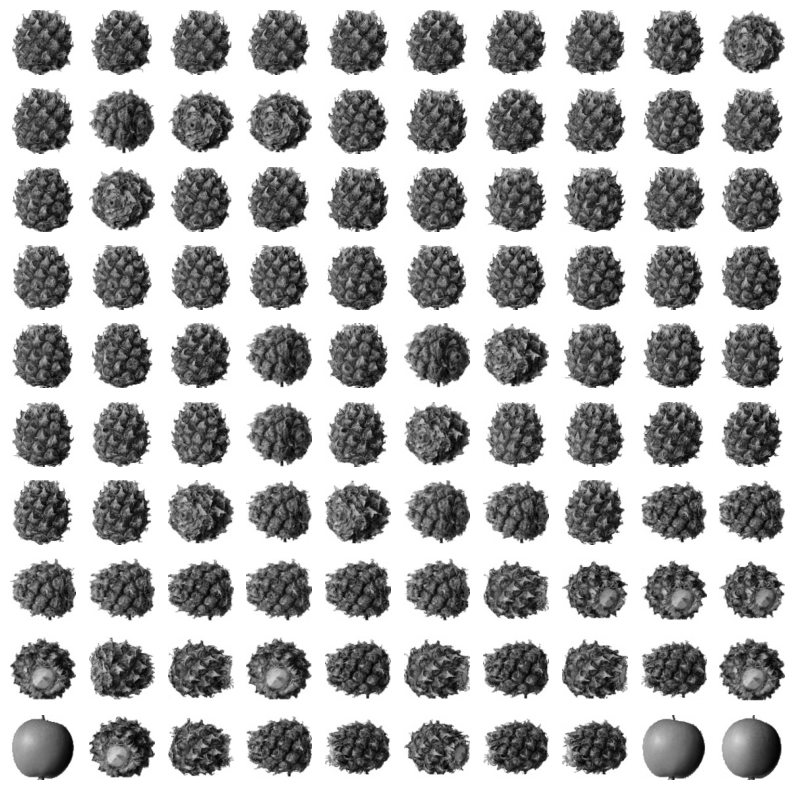

In [53]:
plot_img_array(fruits[pineapple_like_idx])

바나나의 각 픽셀 평균들과의 거리가 짧은 샘플들

In [54]:
diff = np.abs(fruits - banana_px_means.reshape((100, 100)))
diff_mean = np.mean(diff, axis=(1, 2))
banana_like_idx = np.argsort(diff_mean)[:100]
print(banana_like_idx)

[285 212 261 291 208 286 284 265 219 264 252 290 276 283 255 203 266 200
 201 269 247 256 281 270 211 254 268 239 299 225 250 275 280 232 246 205
 244 263 297 224 279 262 289 288 238 287 218 245 217 230 274 295 209 220
 213 267 237 229 248 278 243 204 228 206 207 272 210 241 233 222 214 253
 277 235 240 282 294 271 296 249 215 258 227 259 202 236 293 260 226 216
 292 257 221 298 251 223 242 231   9  88]


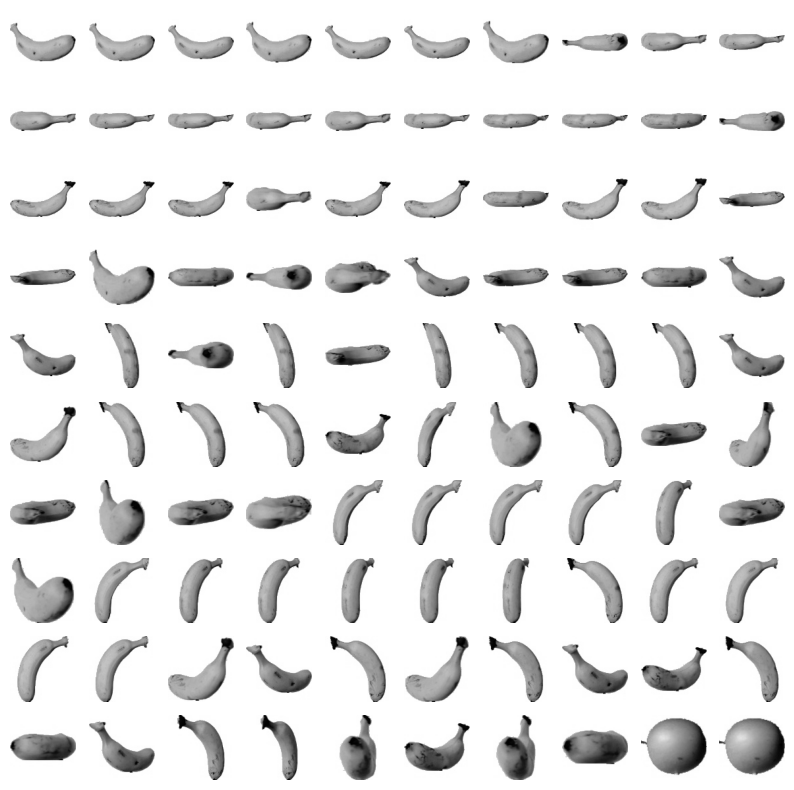

In [55]:
plot_img_array(fruits[banana_like_idx])